In [2]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

In [74]:
from random import choice, randint

class DeutschJozsa:
    def __init__(self, units=3):
        self.qubits = units
        self.circuit = QuantumCircuit(units, units-1)
        self.backend = Aer.get_backend('aer_simulator')
        
    def prepare(self, function_type=choice(["constant", "balanced"]), bit_string_type="random", bit_string=None):
        self.init_states()
        self.add_barrier()
        self.add_oracle(function_type, bit_string_type, bit_string)
        self.add_barrier()
        self.add_colpase()
        self.add_barrier()
        self.add_measurement()
        
    def init_states(self):
        self.circuit.x(0)
        self.circuit.h(range(self.qubits))
        
    def add_barrier(self):
        self.circuit.barrier()
        
    def add_oracle(self, function_type, bit_string_type, bit_string):
        if(bit_string_type == 'random'):
            bit_string = self.get_random_hidden_bit_string()
        else:
            bit_string = self.get_hidden_bit_string_circuit(bit_string)
            
        self.circuit.compose(bit_string, range(self.qubits), inplace=True)
        
        if(function_type == 'balanced'):
            self.generate_balanced_oracle()
            
        self.circuit.compose(bit_string,range(self.qubits),inplace=True)
    
    def get_random_hidden_bit_string(self):
        bit_string_circuit = QuantumCircuit(self.qubits)
        for qubit in range(1, self.qubits):
            if(randint(0, 1)):
                bit_string_circuit.x(qubit)
        return bit_string_circuit
    
    def get_hidden_bit_string_circuit(self, bit_string):
        bit_string_circuit = QuantumCircuit(self.qubits)
        for qubit in range(1, self.qubits):
            if(bit_string[qubit] == '1'):
                bit_string_circuit.x(qubit)
        return bit_string_circuit
                
    def generate_balanced_oracle(self):
        for qubit in range(1, self.qubits):
            self.circuit.cx(qubit, 0)
            
    def add_colpase(self):
        self.circuit.h(range(self.qubits))
        
    def add_measurement(self):
        self.circuit.measure(range(1, self.qubits), range(0, self.qubits-1))
        
    def draw(self):
        display(self.circuit.draw('mpl'))
        
    def measure(self):
        results = self.backend.run(self.circuit, shots=1000).result().get_counts()
        display(plot_histogram(results))

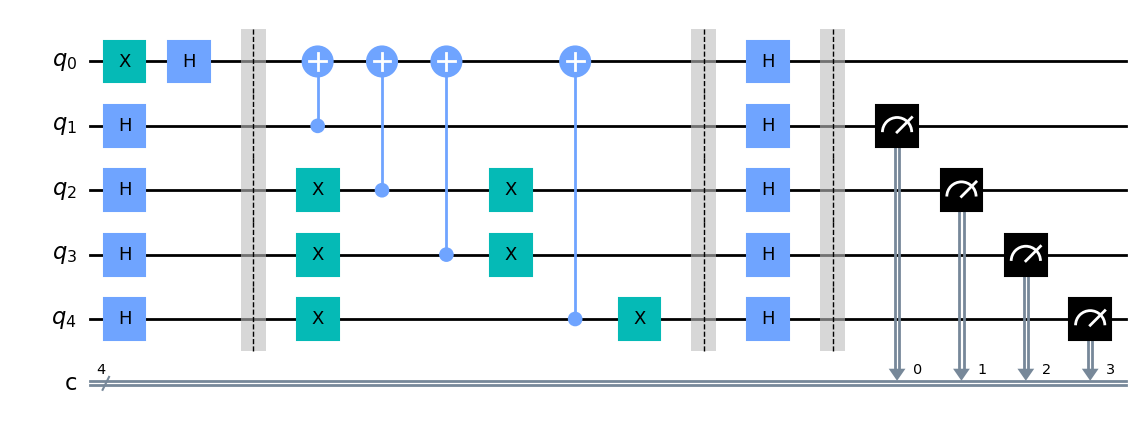

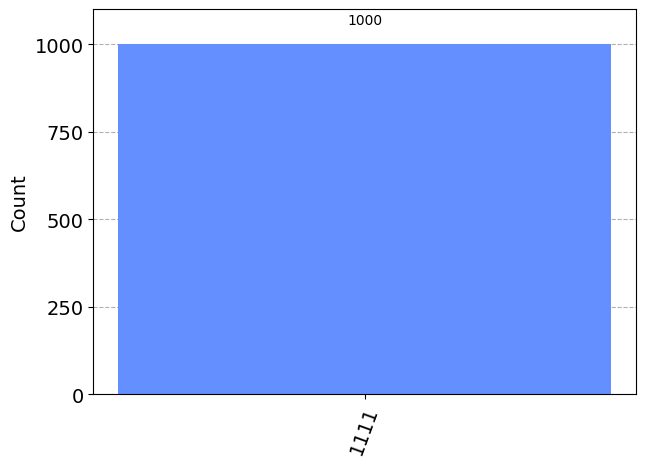

In [77]:
algorithm = DeutschJozsa(5)
algorithm.prepare(function_type="balanced")
algorithm.draw()
algorithm.measure()